In [1]:
import pandas as pd
import numpy as np

## Loading Data

In [2]:
data = pd.read_csv('C:/Users/CHARLIE/anaconda3/HAMOYE/open source project/01-University-Admissions/data/Admission_Predict_Ver1.1.csv')
print(data.shape)

(500, 9)


In [3]:
# Splitting into train and test
train = data.iloc[:400, :]
test = data.iloc[400:, :]
print(train.shape)
print(test.shape)

(400, 9)
(100, 9)


In [4]:
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
test.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
400,401,304,100,2,3.5,3.0,8.22,0,0.63
401,402,315,105,2,3.0,3.0,8.34,0,0.66
402,403,324,109,3,3.5,3.0,8.94,1,0.78
403,404,330,116,4,4.0,3.5,9.23,1,0.91
404,405,311,101,3,2.0,2.5,7.64,1,0.62


In [6]:
train = train.drop(['Serial No.'], axis=1)

In [7]:
test = test.drop(['Serial No.'], axis=1)

In [8]:
train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

GRE Score
TOEFL Score
Statement od Purpose
Letter of Recommendation
CGPA
Chance of Admission


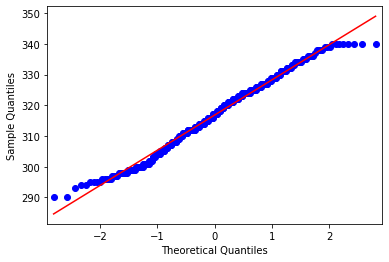

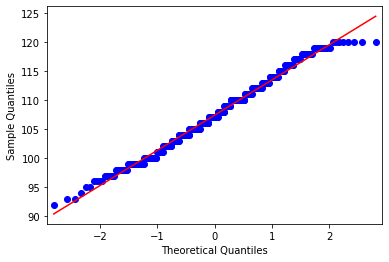

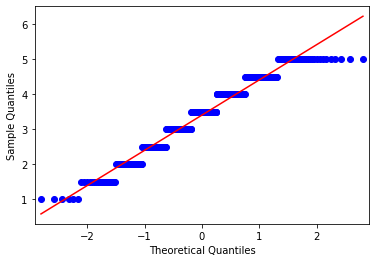

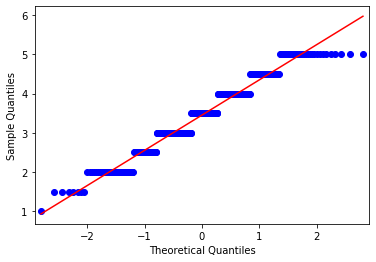

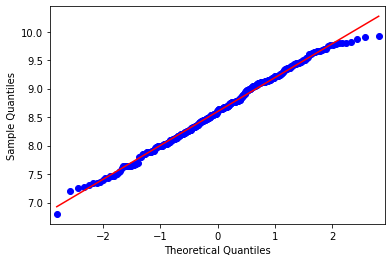

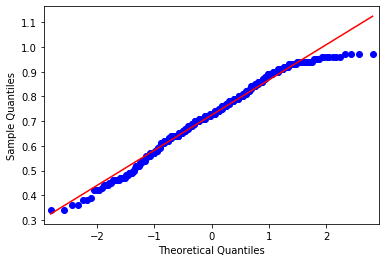

In [9]:
# showing qqplots for normality
import statsmodels.api as sm
import pylab
print('GRE Score')
sm.qqplot(train['GRE Score'], line='s')
print('TOEFL Score')
sm.qqplot(train['TOEFL Score'], line='s')
print('Statement od Purpose')
sm.qqplot(train['SOP'], line='s')
print('Letter of Recommendation')
sm.qqplot(train['LOR '], line='s')
print('CGPA')
sm.qqplot(train['CGPA'], line='s')
print('Chance of Admission')
sm.qqplot(train['Chance of Admit '], line='s')
pylab.show()

In [9]:
#Kolmogorov Smirnov Test for Normality
from scipy.stats import kstest

feature_list = list(train.columns)
for feature in feature_list:
    output = kstest(train[feature], 'norm', N=100)
    print(f'Kolmogorov Test for {feature} = {output}')

Kolmogorov Test for GRE Score = KstestResult(statistic=1.0, pvalue=0.0)
Kolmogorov Test for TOEFL Score = KstestResult(statistic=1.0, pvalue=0.0)
Kolmogorov Test for University Rating = KstestResult(statistic=0.9122498680518207, pvalue=0.0)
Kolmogorov Test for SOP = KstestResult(statistic=0.9181927987311419, pvalue=0.0)
Kolmogorov Test for LOR  = KstestResult(statistic=0.9572498680518208, pvalue=0.0)
Kolmogorov Test for CGPA = KstestResult(statistic=0.9999999999947691, pvalue=0.0)
Kolmogorov Test for Research = KstestResult(statistic=0.5, pvalue=5.390131481240781e-93)
Kolmogorov Test for Chance of Admit  = KstestResult(statistic=0.6452572731517505, pvalue=7.148882731189418e-163)


In [10]:
# Test for normality
from scipy.stats import normaltest

feature_list = list(train.columns)
for feature in feature_list:
    output, p = normaltest(train[feature])
    print(f'p-value for normal test for {feature} = {p}')

p-value for normal test for GRE Score = 4.714531292500165e-05
p-value for normal test for TOEFL Score = 0.003945790155853822
p-value for normal test for University Rating = 8.481821275449478e-08
p-value for normal test for SOP = 1.2935069117407045e-05
p-value for normal test for LOR  = 0.0001848420027465647
p-value for normal test for CGPA = 0.052520729609327604
p-value for normal test for Research = 0.0
p-value for normal test for Chance of Admit  = 0.0028666562891090314


In [11]:
cat_df = train[['University Rating', 'Research', 'Chance of Admit ']]
num_df = train.drop(['University Rating', 'Research', 'Chance of Admit '], axis=1)

In [33]:
cat_test_df = test[['University Rating', 'Research', 'Chance of Admit ']].reset_index(drop=True)
num_test_df = test.drop(['University Rating', 'Research', 'Chance of Admit '], axis=1)

In [34]:
cat_test_df.shape

(100, 3)

In [35]:
num_test_df.shape

(100, 5)

In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
pt.fit(num_df)
train_num_trans = pt.transform(num_df)
test_num_trans = pt.transform(num_test_df)

In [38]:
train_num_trans_df = pd.DataFrame(train_num_trans, columns=num_df.columns)
test_num_trans_df = pd.DataFrame(test_num_trans, columns=num_df.columns)

In [43]:
train_df = pd.concat([cat_df, train_num_trans_df], axis=1)
test_df = pd.concat([cat_test_df, test_num_trans_df], axis=1)

In [44]:
print(train_df.shape)
print(test_df.shape)

(400, 8)
(100, 8)


In [45]:
test_df.tail()

,University Rating,Research,Chance of Admit,GRE Score,TOEFL Score,SOP,LOR,CGPA
95,5,1,0.87,1.336133,0.111768,1.114575,0.606020,0.702145
96,5,1,0.96,1.789413,1.561128,1.663659,1.742376,2.174306
97,5,1,0.93,1.156126,2.031343,1.114575,1.742376,1.632504
98,4,0,0.73,-0.430106,-0.720535,0.580393,1.742376,-0.294156
99,4,0,0.84,0.887519,0.924360,1.114575,1.172165,0.736292


In [46]:
train_df.head(2)

,University Rating,Research,Chance of Admit,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,4,1,0.92,1.789413,1.718552,1.114575,1.172165,1.789231
1,4,1,0.76,0.620599,-0.053072,0.580393,1.172165,0.446813


In [47]:
train_df['Chance of Admit '].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

In [73]:
# import seaborn as sns
# sns.distplot(train_df['GRE Score'])

In [74]:
# sm.qqplot(train_df['Chance of Admit '], line='s')

## Modelling

In [49]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, BayesianRidge, HuberRegressor, RANSACRegressor, Lasso, Ridge, ElasticNet

In [50]:
#creating dummy variables for University Rating and Research
train_df = pd.get_dummies(train_df, columns=['University Rating', 'Research'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['University Rating', 'Research'], drop_first=True)

In [51]:
## Transforming our target
from scipy.stats import boxcox
train_df['Chance of Admit '], lambd = boxcox(train_df['Chance of Admit '])

In [65]:
test_df['Chance of Admit '] = boxcox(test_df['Chance of Admit '], lmbda=lambd)

In [52]:
# Splitting into features and Targets
X = train_df.drop(['Chance of Admit '], axis=1)
y = train_df['Chance of Admit ']

## Linear Models
#### I ran multiple linear models using 10 fold cross validation to see how each performed

In [53]:
fold = KFold(n_splits=10, random_state=2020, shuffle=True)

rmse_list = []
f_num = 0
for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model= LinearRegression()
    model.fit(x_train, y_train)
    p_val = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1

print(f'Mean RMSE Value for LinearRegression = {np.mean(rmse_list)}')

Mean RMSE Value for LinearRegression = 0.04804980878855401


In [54]:
rmse_list = []
for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= BayesianRidge()
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1

print(f'Mean RMSE Value for BayesianRidge = {np.mean(rmse_list)}')

Mean RMSE Value for BayesianRidge = 0.047951028533741884


In [55]:
rmse_list = []
for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= HuberRegressor(max_iter=2000)
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1

print(f'Mean RMSE Value for Huber Regressor= {np.mean(rmse_list)}')

Mean RMSE Value for Huber Regressor= 0.04813133929712643


In [56]:
rmse_list = []

for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= RANSACRegressor(loss='squared_loss', random_state=42)
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1

print(f'Mean RMSE Value for RANSACRegressor = {np.mean(rmse_list)}')

Mean RMSE Value for RANSACRegressor = 0.04798723613296314


In [57]:
rmse_list = []
# f_num = 0
for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= Ridge(alpha=0.0001)
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1

print(f'Mean RMSE Value for Ridge = {np.mean(rmse_list)}')

Mean RMSE Value for Ridge = 0.04804980465242226


In [58]:
rmse_list = []
for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model2= Lasso(alpha=0.0001)
    model2.fit(x_train, y_train)
    p_val = model2.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1

print(f'Mean RMSE Value for Lasso = {np.mean(rmse_list)}')

Mean RMSE Value for Lasso = 0.04803302240428089


## Tree Based Model

In [59]:
from xgboost import XGBRegressor

In [60]:
rmse_list = []
for train_index, val_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    my_mod = XGBRegressor(max_depth = 1, n_estimators = 200, min_child_weight = 7, objective='reg:squarederror')
    my_mod.fit(x_train, y_train)
    p_val = my_mod.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, p_val))
#     print(f'Fold----{f_num} RMSE = {rmse}')
    rmse_list.append(rmse)
#     f_num+=1

print(f'Mean RMSE Value for XGB = {np.mean(rmse_list)}')

Mean RMSE Value for XGB = 0.05037256594700924


##### To perform gridsearch  

In [67]:
X_c = X.copy()
Y_c = y.copy()

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_c, Y_c, test_size=0.2, random_state=42)

In [73]:
from sklearn.model_selection import GridSearchCV
params = {"min_child_weight" : list(range(10)),
         "max_depth" : list(range(1, 6))}
search = GridSearchCV(my_mod, param_grid = params, cv = 3, n_jobs = -1).fit(xtrain, ytrain)

In [74]:
search.best_params_

{'max_depth': 1, 'min_child_weight': 7}

##### Based on the models considered, Bayesian Ridge model has the lowest RMSE of 0.04795

## Training on whole data

In [61]:
main_model = BayesianRidge()
main_model.fit(X,y)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [66]:
final_pred = main_model.predict(test_df.drop(['Chance of Admit '], axis=1))
final_rmse = np.sqrt(mean_squared_error(test_df['Chance of Admit '], final_pred))
print(f'RMSE on test data = {final_rmse}')

RMSE on test data = 0.03226305351848164


In [68]:
final_pred

array([-0.34233525, -0.30227961, -0.20336785, -0.13474956, -0.36710026,
       -0.4133104 , -0.30533126, -0.33649236, -0.35960091, -0.36691153,
       -0.38594406, -0.37768133, -0.34032677, -0.34046869, -0.23451394,
       -0.19124633, -0.33311069, -0.37908912, -0.30628614, -0.32407908,
       -0.41744472, -0.17385238, -0.19273606, -0.04890695, -0.08229247,
       -0.0554656 , -0.24787403, -0.23718984, -0.24440202, -0.10237017,
       -0.30006568, -0.20957269, -0.14638065, -0.22501374, -0.33080719,
       -0.35218088, -0.34461478, -0.31684739, -0.22681579, -0.29570314,
       -0.3925885 , -0.1979163 , -0.09688319, -0.12477832, -0.10570706,
       -0.10792084, -0.06822246, -0.17513167, -0.21810198, -0.21434792,
       -0.17642205, -0.13256144, -0.10379408, -0.22558155, -0.33047996,
       -0.39434821, -0.39572194, -0.4269284 , -0.27105068, -0.13171644,
       -0.21406941, -0.34449637, -0.34071573, -0.35418099, -0.44644793,
       -0.31375039, -0.23085922, -0.18832817, -0.16671497, -0.15

In [71]:
## Rescaling our target variable
from scipy.special import inv_boxcox
final_pred_inverse = inv_boxcox(final_pred, lambd)

In [72]:
final_pred_inverse

array([0.60768456, 0.66064893, 0.78155451, 0.85904196, 0.57347827,
       0.50602144, 0.65670686, 0.61558321, 0.58396596, 0.57374365,
       0.54658923, 0.55847736, 0.61040677, 0.61021465, 0.74479332,
       0.79557678, 0.62012641, 0.5564629 , 0.65547037, 0.63216145,
       0.49971951, 0.81543772, 0.79386165, 0.95033175, 0.91549337,
       0.94355013, 0.72868031, 0.74158325, 0.73288861, 0.89414559,
       0.66349985, 0.77431673, 0.8462163 , 0.75612214, 0.62320946,
       0.59423028, 0.60458588, 0.64169761, 0.75398125, 0.66909573,
       0.53691323, 0.78787984, 0.90001045, 0.8699445 , 0.89056733,
       0.88818854, 0.93027315, 0.81398714, 0.76429927, 0.7687182 ,
       0.81252237, 0.86144169, 0.89261976, 0.75544796, 0.62364667,
       0.53433272, 0.5323129 , 0.48507567, 0.70019589, 0.86236731,
       0.76904541, 0.60474709, 0.60988017, 0.59147424, 0.45404368,
       0.64575501, 0.74916393, 0.79892991, 0.82350195, 0.83970757,
       0.85918787, 0.64169113, 0.89755338, 0.64111017, 0.62813

In [78]:
## checking rmse between target variable in main scale
main_test_rmse = np.sqrt(mean_squared_error(test['Chance of Admit '], final_pred_inverse))
print(f'Final RMSE value on test data = {main_test_rmse}')

Final RMSE value on test data = 0.04199644794220173


#### Creating a dataframe to show coefficients of features in our model

In [88]:
main_model.intercept_

-0.2497700962594497

In [89]:
weights = list(main_model.coef_)
# weights

In [90]:
weights.insert(0, main_model.intercept_)

In [91]:
test_df.drop(['Chance of Admit '], axis=1).columns

Index(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA',
       'University Rating_2', 'University Rating_3', 'University Rating_4',
       'University Rating_5', 'Research_1'],
      dtype='object')

In [92]:
weights_df = pd.DataFrame({'Features':['Intercept','GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA',
                                       'University Rating_2', 'University Rating_3', 'University Rating_4',
                                       'University Rating_5', 'Research_1'], 'Coefficients':weights})


In [94]:
weights_df.T

,0,1,2,3,4,5,6,7,8,9,10
Features,Intercept,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating_2,University Rating_3,University Rating_4,University Rating_5,Research_1
Coefficients,-0.24977,0.0171074,0.0155085,-0.000227392,0.0151212,0.053527,-0.0122073,-0.0106045,-0.00347965,0.014631,0.0195838
